## Install and import libraries

In [1]:
#%pip install scikit-learn numpy pandas matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestRegressor


## Load the datasets

In [2]:
df = pd.read_csv("sales.csv")
pd.DataFrame(df)
df.head()

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882


# Drop the columns that do not affect the sales column based on the correlation matrix


In [3]:
df.drop(['Unnamed: 0', 'date', 'state_holiday','school_holiday','day_of_week'], axis=1, inplace=True)

# Compute the correlation matrix


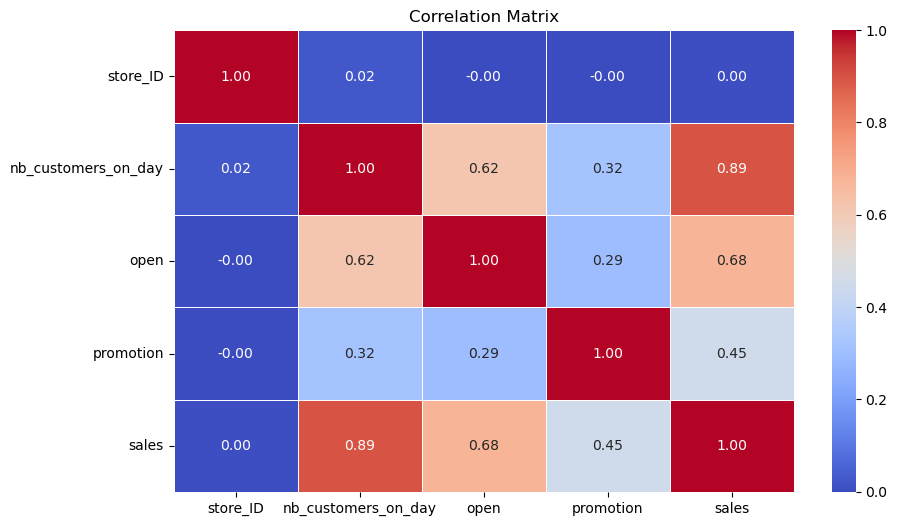

In [4]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

## split the data to train and test

In [ ]:

# Define features (X) and target (y)
x=df.drop('sales', axis=1)
y=df.sales  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


## Using Random Forest Regressor model

In [6]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

## Predict and evaluate the data

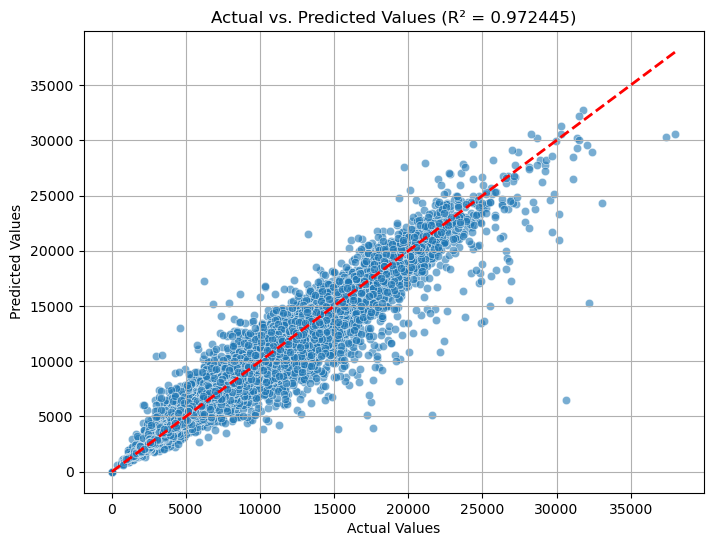

In [7]:
y_pred_rf = rf.predict(x_test)

# R² Score
r2 = r2_score(y_test, y_pred_rf)

# Scatter Plot of Predictions vs. Actual Values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)  # Perfect fit line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Actual vs. Predicted Values (R² = {r2:.6f})")
plt.grid(True)
plt.show()



## Using Linear Regression model

In [8]:
model_linear = LinearRegression()
model_linear.fit(x_train, y_train)


LinearRegression()

## Predict and evaluate the data

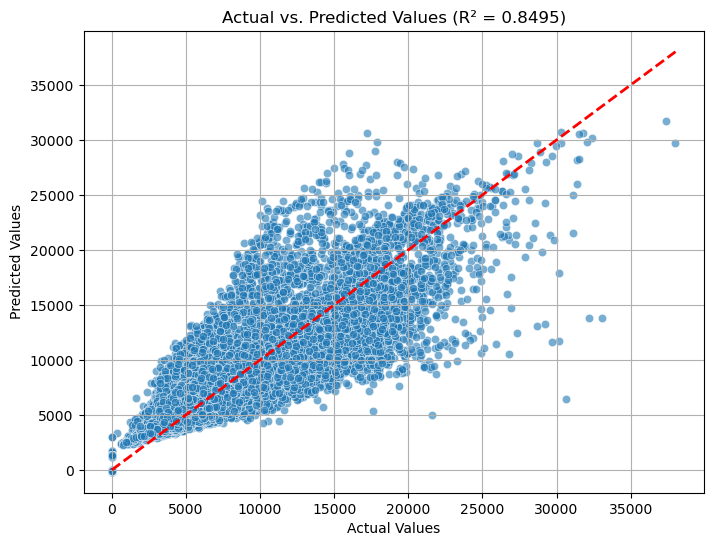

In [19]:
# Predictions
y_pred_linear = model_linear.predict(x_test)

# R² Score
r2 = r2_score(y_test, y_pred_linear)

# Scatter Plot of Predictions vs. Actual Values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_linear, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)  # Perfect fit line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Actual vs. Predicted Values (R² = {r2:.4f})")
plt.grid(True)
plt.show()

## Using ExtraTrees model

In [10]:
extra_trees = ExtraTreesRegressor(n_estimators=100, random_state=42)
extra_trees.fit(x_train, y_train)

y_pred_extra_trees = extra_trees.predict(x_test)


### Predict and evaluate the data

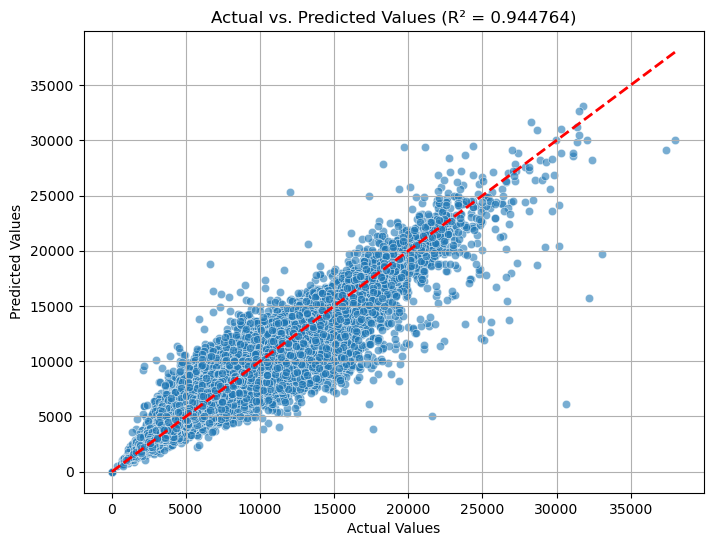

In [11]:
# R² Score
r2 = r2_score(y_test, y_pred_extra_trees)

# Scatter Plot of Predictions vs. Actual Values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_extra_trees, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)  # Perfect fit line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Actual vs. Predicted Values (R² = {r2:.6f})")
plt.grid(True)
plt.show()

## Load the real data from the CSV file

In [36]:
real_data = pd.read_csv("REAL_DATA.csv")
pd.DataFrame(real_data)


,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday
0,272371,415,7,01/03/2015,0,0,0,0,0
1,558468,27,7,29/12/2013,0,0,0,0,0
2,76950,404,3,19/03/2014,657,1,1,0,0
3,77556,683,2,29/01/2013,862,1,0,0,0
4,456344,920,3,19/03/2014,591,1,1,0,0
...,...,...,...,...,...,...,...,...,...
71200,59062,441,7,26/10/2014,0,0,0,0,0
71201,687449,377,7,18/08/2013,0,0,0,0,0
71202,207393,15,3,11/06/2014,648,1,0,0,0
71203,233378,950,2,23/04/2013,626,1,1,0,0


## Remove unnecessary columns that do not significantly impact the sales column

In [37]:
real_data.drop(['index', 'date', 'state_holiday','day_of_week'], axis=1, inplace=True)
real_data = real_data[x_train.columns]


## Predict sales using the  Random Forest Regressor model


In [32]:
real_data["sales"] = rf.predict(real_data)
real_data.to_csv("REAL_DATA_with_predictions.csv", index=False)
real_data.head()

,store_ID,nb_customers_on_day,open,promotion,sales
0,415,0,0,0,0.000000
1,27,0,0,0,0.000000
2,404,657,1,1,5399.902500
3,683,862,1,0,8474.441333
4,920,591,1,1,6294.060000


## Predict sales using the ExtraTrees model


In [35]:
real_data["sales"] = extra_trees.predict(real_data)
real_data.to_csv("REAL_DATA_with_predictions.csv", index=False)
real_data.head()

,store_ID,nb_customers_on_day,open,promotion,sales
0,415,0,0,0,0.00
1,27,0,0,0,0.00
2,404,657,1,1,5478.50
3,683,862,1,0,8745.72
4,920,591,1,1,6367.00


# Predict sales using the LinearRegression model

In [38]:
real_data["sales"] = np.maximum(0, model_linear.predict(real_data))
real_data.to_csv("REAL_DATA_with_predictions.csv", index=False)
real_data.head()

,store_ID,nb_customers_on_day,open,promotion,sales
0,415,0,0,0,0.000000
1,27,0,0,0,0.000000
2,404,657,1,1,7076.547421
3,683,862,1,0,6948.266371
4,920,591,1,1,6599.559930


Random Forest: R² = 0.9724453770788358 , MSE = 407303.10397371085 , MAE = 374.0446503426074
Linear Regression: R² = 0.8495476235237476 , MSE = 2223936.0746951518 , MAE = 986.9169314947171
Extra Trees: R² = 0.9447636073335528 , MSE = 816485.6492401656 , MAE = 551.4563913485512


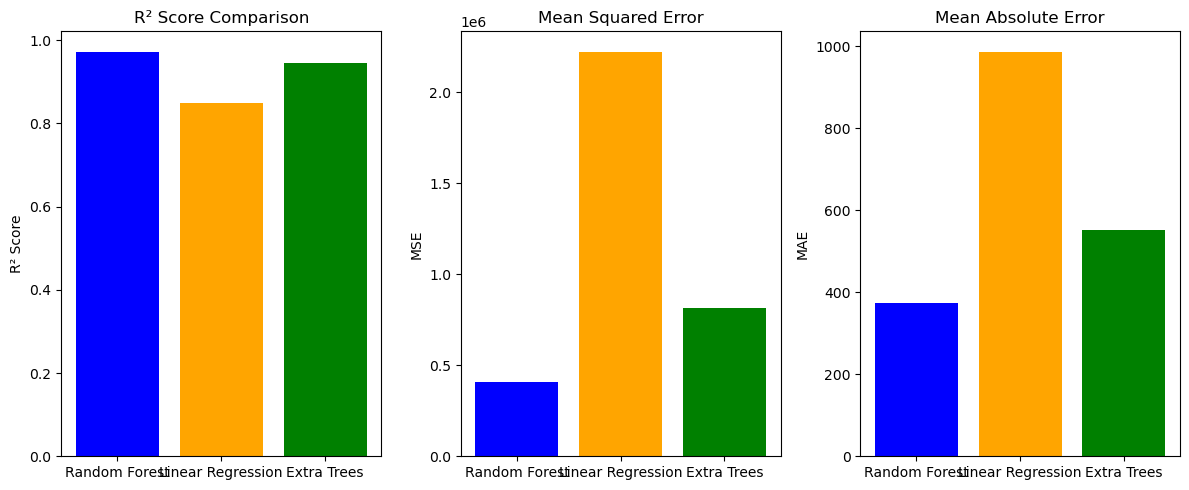

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

y_pred_rf = rf.predict(x_test)
y_pred_linear = model_linear.predict(x_test)
y_pred_extra_trees = extra_trees.predict(x_test)

r2_rf = r2_score(y_test, y_pred_rf)
r2_linear = r2_score(y_test, y_pred_linear)
r2_extra_trees = r2_score(y_test, y_pred_extra_trees)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_extra_trees = mean_squared_error(y_test, y_pred_extra_trees)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mae_extra_trees = mean_absolute_error(y_test, y_pred_extra_trees)

print("Random Forest: R² =", r2_rf, ", MSE =", mse_rf, ", MAE =", mae_rf)
print("Linear Regression: R² =", r2_linear, ", MSE =", mse_linear, ", MAE =", mae_linear)
print("Extra Trees: R² =", r2_extra_trees, ", MSE =", mse_extra_trees, ", MAE =", mae_extra_trees)

models = ['Random Forest', 'Linear Regression', 'Extra Trees']
r2_scores = [r2_rf, r2_linear, r2_extra_trees]
mse_scores = [mse_rf, mse_linear, mse_extra_trees]
mae_scores = [mae_rf, mae_linear, mae_extra_trees]

x = np.arange(len(models))
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.bar(x, r2_scores, color=['blue', 'orange', 'green'])
plt.xticks(x, models)
plt.ylabel("R² Score")
plt.title("R² Score Comparison")

plt.subplot(1, 3, 2)
plt.bar(x, mse_scores, color=['blue', 'orange', 'green'])
plt.xticks(x, models)
plt.ylabel("MSE")
plt.title("Mean Squared Error")

plt.subplot(1, 3, 3)
plt.bar(x, mae_scores, color=['blue', 'orange', 'green'])
plt.xticks(x, models)
plt.ylabel("MAE")
plt.title("Mean Absolute Error")

plt.tight_layout()
plt.show()
